##Gamma-Vega Hedging

###1. Gamma Hedging
Gamma Hedging은 델타의 변화에 대한 민감도인 감마를 조정하여 헤징하는 전략입니다. 델타 헤징만으로는 기초 자산의 큰 변동성에 대응하기 어렵기 때문에 감마 헤징을 통해 델타를 보다 안정적으로 유지할 수 있습니다.

###2. Vega Hedging
Vega Hedging은 옵션 가격의 변동성 변화에 대한 민감도를 조정하는 전략입니다. 변동성 자체가 변할 때 발생하는 리스크를 관리하기 위해 사용됩니다.

###3. Theta Hedging
Theta Hedging은 시간의 경과에 따른 옵션 가격의 민감도를 조정하는 전략입니다. 옵션의 시간가치 감소를 관리하기 위해 사용됩니다.

###4. Dynamic Hedging
Dynamic Hedging은 델타, 감마, 베가 등 여러 그릭스(Greeks)를 조합하여 지속적으로 포지션을 조정하는 전략입니다. 주기적으로 또는 특정 조건이 발생할 때마다 포지션을 조정하여 리스크를 최소화합니다.

[*********************100%%**********************]  1 of 1 completed


                 Close   Returns  Cumulative Returns     Delta     Gamma  \
Date                                                                       
2023-12-22  193.600006 -0.005547            0.547933  0.948003  0.002748   
2023-12-26  193.050003 -0.002841            0.543536  0.946472  0.002820   
2023-12-27  193.149994  0.000518            0.544335  0.946754  0.002807   
2023-12-28  193.580002  0.002226            0.547773  0.947948  0.002751   
2023-12-29  192.529999 -0.005424            0.539378  0.944988  0.002889   

                Vega     Theta  Gamma Hedge Position  Vega Hedge Position  \
Date                                                                        
2023-12-22  0.205992 -8.645063             -0.002748            -0.205992   
2023-12-26  0.210191 -8.672255             -0.002820            -0.210191   
2023-12-27  0.209424 -8.667296             -0.002807            -0.209424   
2023-12-28  0.206144 -8.646048             -0.002751            -0.206144   
2023-

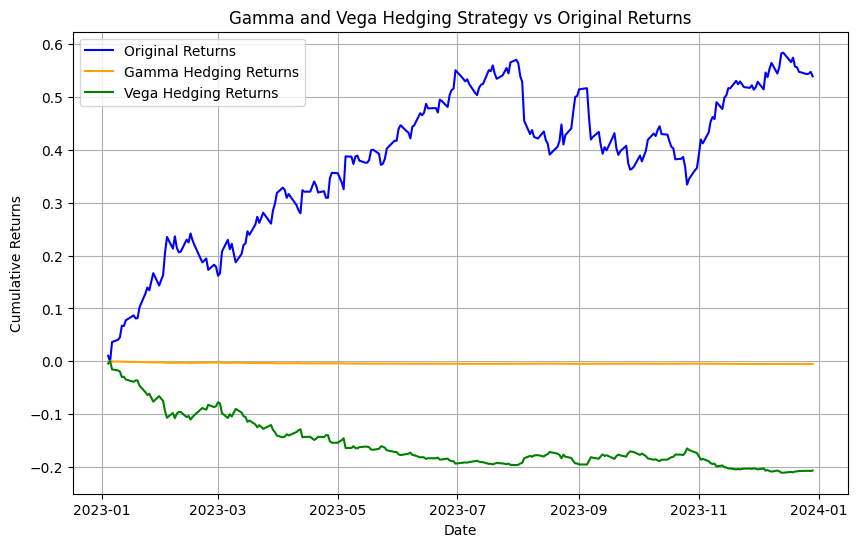

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def black_scholes_merton_greeks(S, K, T, r, sigma, option_type="call"):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    delta = norm.cdf(d1) if option_type == "call" else norm.cdf(d1) - 1
    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    vega = S * norm.pdf(d1) * np.sqrt(T) / 100  # Vega per 1% change in volatility
    theta = - (S * norm.pdf(d1) * sigma) / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * norm.cdf(d2)

    return delta, gamma, vega, theta

# yfinance를 사용하여 데이터 다운로드
ticker = 'AAPL'
data = yf.download(ticker, start="2023-01-01", end="2023-12-31")
data['Returns'] = data['Close'].pct_change()

# 예제 파라미터
K = 150  # 행사가격
T = 1  # 만기 시간 (1년)
r = 0.05  # 무위험 이자율
sigma = 0.2  # 변동성
option_type = "call"

# Greeks 계산 및 Gamma-Vega Hedging 전략 적용
data[['Delta', 'Gamma', 'Vega', 'Theta']] = data.apply(lambda row: pd.Series(black_scholes_merton_greeks(row['Close'], K, T, r, sigma, option_type)), axis=1)
data['Gamma Hedge Position'] = -data['Gamma']
data['Vega Hedge Position'] = -data['Vega']
data['Gamma Hedge Returns'] = data['Gamma Hedge Position'].shift(1) * data['Returns']
data['Vega Hedge Returns'] = data['Vega Hedge Position'].shift(1) * data['Returns']

# 누적 수익률 계산
data['Cumulative Returns'] = (1 + data['Returns']).cumprod() - 1
data['Cumulative Gamma Hedge Returns'] = (1 + data['Gamma Hedge Returns']).cumprod() - 1
data['Cumulative Vega Hedge Returns'] = (1 + data['Vega Hedge Returns']).cumprod() - 1

# 결과 출력
print(data[['Close', 'Returns', 'Cumulative Returns', 'Delta', 'Gamma', 'Vega', 'Theta', 'Gamma Hedge Position', 'Vega Hedge Position', 'Gamma Hedge Returns', 'Vega Hedge Returns', 'Cumulative Gamma Hedge Returns', 'Cumulative Vega Hedge Returns']].tail())

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Cumulative Returns'], label='Original Returns', color='blue')
plt.plot(data.index, data['Cumulative Gamma Hedge Returns'], label='Gamma Hedging Returns', color='orange')
plt.plot(data.index, data['Cumulative Vega Hedge Returns'], label='Vega Hedging Returns', color='green')
plt.title('Gamma and Vega Hedging Strategy vs Original Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()


## Delta Hedging 추가

[*********************100%%**********************]  1 of 1 completed


                 Close   Returns  Cumulative Returns     Delta     Gamma  \
Date                                                                       
2023-12-22  193.600006 -0.005547            0.547933  0.948003  0.002748   
2023-12-26  193.050003 -0.002841            0.543536  0.946472  0.002820   
2023-12-27  193.149994  0.000518            0.544335  0.946754  0.002807   
2023-12-28  193.580002  0.002226            0.547773  0.947948  0.002751   
2023-12-29  192.529999 -0.005424            0.539378  0.944988  0.002889   

                Vega     Theta  Delta Hedge Position  Gamma Hedge Position  \
Date                                                                         
2023-12-22  0.205992 -8.645063             -0.948003             -0.002748   
2023-12-26  0.210191 -8.672255             -0.946472             -0.002820   
2023-12-27  0.209424 -8.667296             -0.946754             -0.002807   
2023-12-28  0.206144 -8.646048             -0.947948             -0.002751   

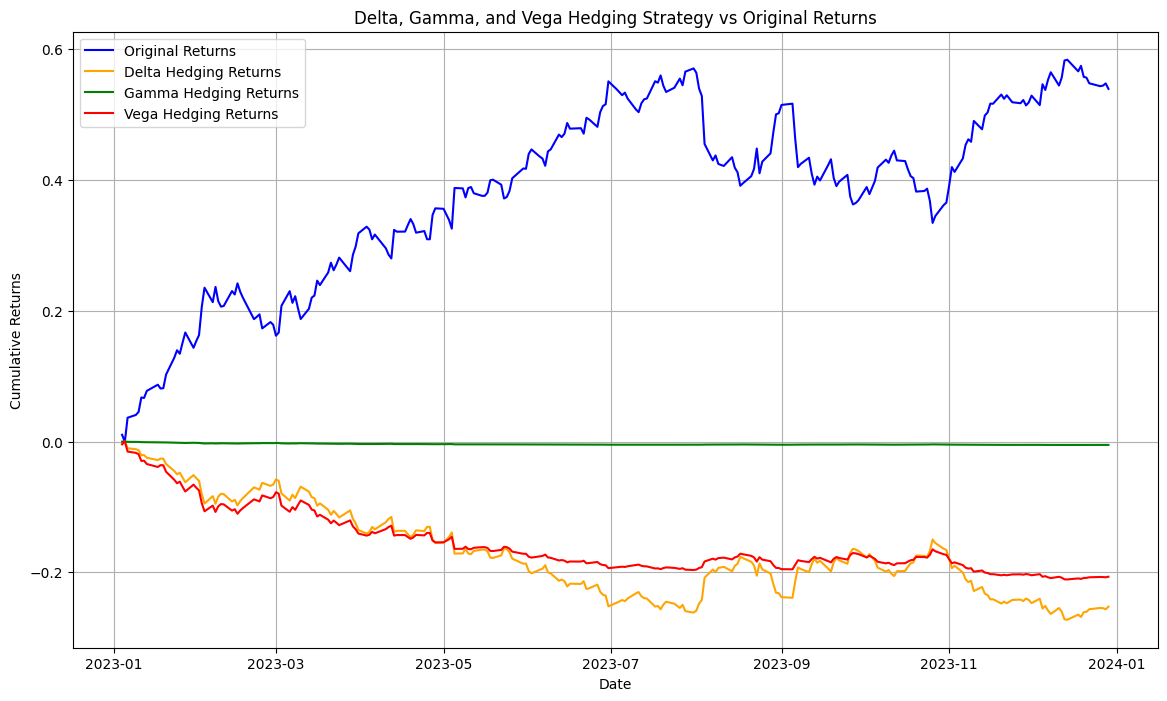

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def black_scholes_merton_greeks(S, K, T, r, sigma, option_type="call"):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    delta = norm.cdf(d1) if option_type == "call" else norm.cdf(d1) - 1
    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    vega = S * norm.pdf(d1) * np.sqrt(T) / 100  # Vega per 1% change in volatility
    theta = - (S * norm.pdf(d1) * sigma) / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * norm.cdf(d2)

    return delta, gamma, vega, theta

# yfinance를 사용하여 데이터 다운로드
ticker = 'AAPL'
data = yf.download(ticker, start="2023-01-01", end="2023-12-31")
data['Returns'] = data['Close'].pct_change()

# 예제 파라미터
K = 150  # 행사가격
T = 1  # 만기 시간 (1년)
r = 0.05  # 무위험 이자율
sigma = 0.2  # 변동성
option_type = "call"

# Greeks 계산 및 Hedging 전략 적용
data[['Delta', 'Gamma', 'Vega', 'Theta']] = data.apply(lambda row: pd.Series(black_scholes_merton_greeks(row['Close'], K, T, r, sigma, option_type)), axis=1)
data['Delta Hedge Position'] = -data['Delta']
data['Gamma Hedge Position'] = -data['Gamma']
data['Vega Hedge Position'] = -data['Vega']
data['Delta Hedge Returns'] = data['Delta Hedge Position'].shift(1) * data['Returns']
data['Gamma Hedge Returns'] = data['Gamma Hedge Position'].shift(1) * data['Returns']
data['Vega Hedge Returns'] = data['Vega Hedge Position'].shift(1) * data['Returns']

# 누적 수익률 계산
data['Cumulative Returns'] = (1 + data['Returns']).cumprod() - 1
data['Cumulative Delta Hedge Returns'] = (1 + data['Delta Hedge Returns']).cumprod() - 1
data['Cumulative Gamma Hedge Returns'] = (1 + data['Gamma Hedge Returns']).cumprod() - 1
data['Cumulative Vega Hedge Returns'] = (1 + data['Vega Hedge Returns']).cumprod() - 1

# 결과 출력
print(data[['Close', 'Returns', 'Cumulative Returns', 'Delta', 'Gamma', 'Vega', 'Theta', 'Delta Hedge Position', 'Gamma Hedge Position', 'Vega Hedge Position', 'Delta Hedge Returns', 'Gamma Hedge Returns', 'Vega Hedge Returns', 'Cumulative Delta Hedge Returns', 'Cumulative Gamma Hedge Returns', 'Cumulative Vega Hedge Returns']].tail())

# 시각화
plt.figure(figsize=(14, 8))
plt.plot(data.index, data['Cumulative Returns'], label='Original Returns', color='blue')
plt.plot(data.index, data['Cumulative Delta Hedge Returns'], label='Delta Hedging Returns', color='orange')
plt.plot(data.index, data['Cumulative Gamma Hedge Returns'], label='Gamma Hedging Returns', color='green')
plt.plot(data.index, data['Cumulative Vega Hedge Returns'], label='Vega Hedging Returns', color='red')
plt.title('Delta, Gamma, and Vega Hedging Strategy vs Original Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()


## Theta Hedging 추가

[*********************100%%**********************]  1 of 1 completed


                 Close   Returns  Cumulative Returns     Delta     Gamma  \
Date                                                                       
2023-12-22  193.600006 -0.005547            0.547933  0.948003  0.002748   
2023-12-26  193.050003 -0.002841            0.543536  0.946472  0.002820   
2023-12-27  193.149994  0.000518            0.544335  0.946754  0.002807   
2023-12-28  193.580002  0.002226            0.547773  0.947948  0.002751   
2023-12-29  192.529999 -0.005424            0.539378  0.944988  0.002889   

                Vega     Theta  Delta Hedge Position  Gamma Hedge Position  \
Date                                                                         
2023-12-22  0.205992 -8.645063             -0.948003             -0.002748   
2023-12-26  0.210191 -8.672255             -0.946472             -0.002820   
2023-12-27  0.209424 -8.667296             -0.946754             -0.002807   
2023-12-28  0.206144 -8.646048             -0.947948             -0.002751   

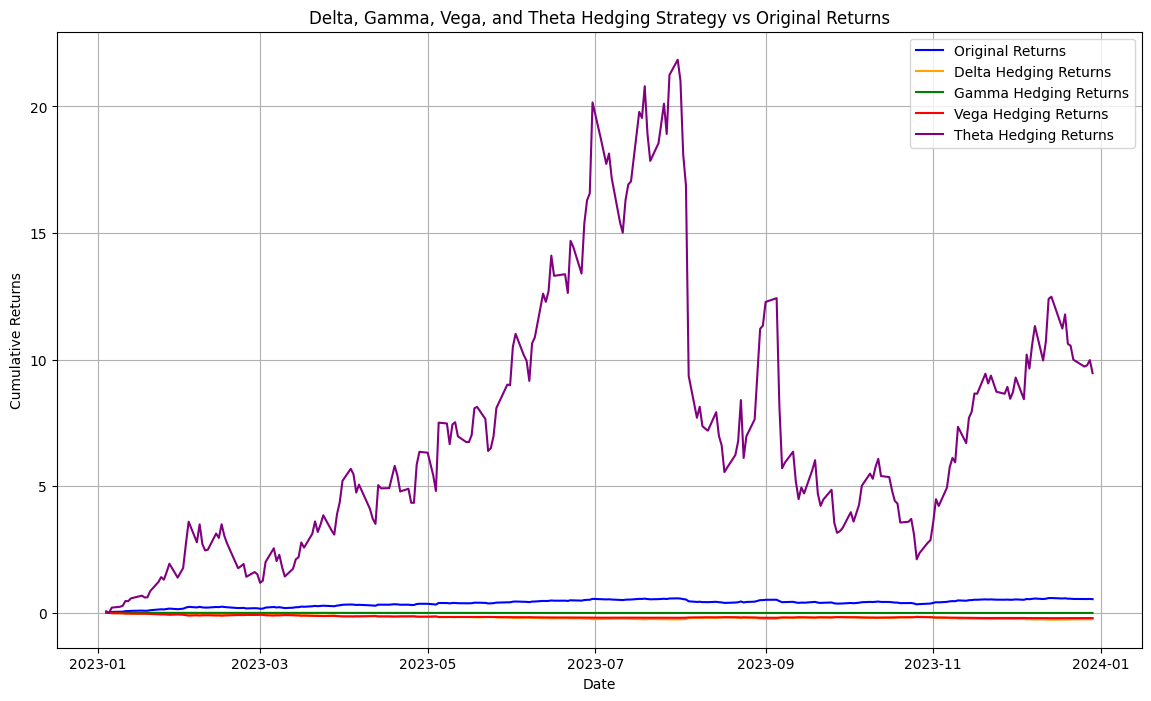

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def black_scholes_merton_greeks(S, K, T, r, sigma, option_type="call"):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    delta = norm.cdf(d1) if option_type == "call" else norm.cdf(d1) - 1
    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    vega = S * norm.pdf(d1) * np.sqrt(T) / 100  # Vega per 1% change in volatility
    theta = - (S * norm.pdf(d1) * sigma) / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * norm.cdf(d2)

    return delta, gamma, vega, theta

# yfinance를 사용하여 데이터 다운로드
ticker = 'AAPL'
data = yf.download(ticker, start="2023-01-01", end="2023-12-31")
data['Returns'] = data['Close'].pct_change()

# 예제 파라미터
K = 150  # 행사가격
T = 1  # 만기 시간 (1년)
r = 0.05  # 무위험 이자율
sigma = 0.2  # 변동성
option_type = "call"

# Greeks 계산 및 Hedging 전략 적용
data[['Delta', 'Gamma', 'Vega', 'Theta']] = data.apply(lambda row: pd.Series(black_scholes_merton_greeks(row['Close'], K, T, r, sigma, option_type)), axis=1)
data['Delta Hedge Position'] = -data['Delta']
data['Gamma Hedge Position'] = -data['Gamma']
data['Vega Hedge Position'] = -data['Vega']
data['Theta Hedge Position'] = -data['Theta']
data['Delta Hedge Returns'] = data['Delta Hedge Position'].shift(1) * data['Returns']
data['Gamma Hedge Returns'] = data['Gamma Hedge Position'].shift(1) * data['Returns']
data['Vega Hedge Returns'] = data['Vega Hedge Position'].shift(1) * data['Returns']
data['Theta Hedge Returns'] = data['Theta Hedge Position'].shift(1) * data['Returns']

# 누적 수익률 계산
data['Cumulative Returns'] = (1 + data['Returns']).cumprod() - 1
data['Cumulative Delta Hedge Returns'] = (1 + data['Delta Hedge Returns']).cumprod() - 1
data['Cumulative Gamma Hedge Returns'] = (1 + data['Gamma Hedge Returns']).cumprod() - 1
data['Cumulative Vega Hedge Returns'] = (1 + data['Vega Hedge Returns']).cumprod() - 1
data['Cumulative Theta Hedge Returns'] = (1 + data['Theta Hedge Returns']).cumprod() - 1

# 결과 출력
print(data[['Close', 'Returns', 'Cumulative Returns', 'Delta', 'Gamma', 'Vega', 'Theta', 'Delta Hedge Position', 'Gamma Hedge Position', 'Vega Hedge Position', 'Theta Hedge Position', 'Delta Hedge Returns', 'Gamma Hedge Returns', 'Vega Hedge Returns', 'Theta Hedge Returns', 'Cumulative Delta Hedge Returns', 'Cumulative Gamma Hedge Returns', 'Cumulative Vega Hedge Returns', 'Cumulative Theta Hedge Returns']].tail())

# 시각화
plt.figure(figsize=(14, 8))
plt.plot(data.index, data['Cumulative Returns'], label='Original Returns', color='blue')
plt.plot(data.index, data['Cumulative Delta Hedge Returns'], label='Delta Hedging Returns', color='orange')
plt.plot(data.index, data['Cumulative Gamma Hedge Returns'], label='Gamma Hedging Returns', color='green')
plt.plot(data.index, data['Cumulative Vega Hedge Returns'], label='Vega Hedging Returns', color='red')
plt.plot(data.index, data['Cumulative Theta Hedge Returns'], label='Theta Hedging Returns', color='purple')
plt.title('Delta, Gamma, Vega, and Theta Hedging Strategy vs Original Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()
